In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.api as sm

In [3]:
df=pd.read_csv("binary.csv")

In [4]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [9]:
df.columns=["admin","gre","gpa","prestige"]
df.head()
df.shape

(400, 4)

In [10]:
df.head()

,admin,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [15]:
pd.crosstab(df["admin"],df["prestige"],rownames=["admin"])

prestige,1,2,3,4
admin,,,,
0,28,97,93,55
1,33,54,28,12


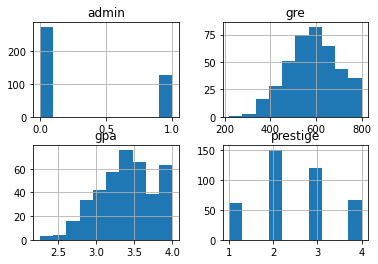

In [18]:
df.hist()
pl.show()

In [19]:
dummy_ranks=pd.get_dummies(df["prestige"],prefix="prestige")
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [23]:
cols_to_keep=["admin","gre","gpa"]
data=df[cols_to_keep].join(dummy_ranks.loc[:,"prestige_2":])
data.head()

,admin,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [24]:
data["intercept"]=1.0
data.head()

,admin,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [27]:
train_cols=data.columns[1:]
logit=sm.Logit(data["admin"],data[train_cols])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [26]:
result=logit.fit()

NameError: name 'logit' is not defined

In [ ]:
i=results.predict